# Bagging for Decision Trees

<font style="font-size:x-large">
    Basic Idea:<br><br>
    <ul>
    <li> Generate decision trees on multiple training sets<br><br>
    <li> Take average of results<br><br>
    <li> Since there is not enough data to create multiple training set, take smaller samples from training data to create simulated training data. <br><br>
     <li> Example of Ensemble Modeling<br><br>
    
    </ul>
    </font>

### Load Wine data from UCI 

In [1]:
uci="http://archive.ics.uci.edu/"
mld="ml/machine-learning-databases/"
redcsv="wine-quality/winequality-red.csv"
wineurl=paste(uci,mld,redcsv,sep="")
wineurl

[1] "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [2]:
red.wine.data=read.csv(wineurl, header = TRUE, sep = ";")

In [3]:
head(red.wine.data,5)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


## Create test and training sets, 75% for training

In [4]:
n=nrow(red.wine.data)
training.indices=sort(sample(1:n,.75*n))  # use 75% for training
train=red.wine.data[training.indices,]
test=red.wine.data[-training.indices,]
ntrain = nrow(train)
ntrain

[1] 1199

In [5]:
library(ipred)
library(rpart)

## Extract y data as a "factor" data structor

- > ### y value is $quality column or column 12 in data frames

## Extract x data as an array or data frame

In [6]:
y.train=as.factor(train[,12])
x.train=train[,1:11]

y.test=as.factor(test[,12])
x.test=test[,1:11]


## Do bagging. The parameters used are as suggested in the reference manual 

## The y-data must be a "factor"
## The x-data should be a data frame

In [7]:
bag.model = ipredbagg(
    y.train,    # y data from training set
    x.train,    # x data from training set
    nbagg=25, 
    control=
    rpart.control(minsplit=2, cp=0, xval=0, method="factor"),
    comb=NULL, coob=TRUE, ns=ntrain, keepX = TRUE)

In [8]:
bag.model   # print a summary to verify it did classification and not regression


Bagging classification trees with 25 bootstrap replications 
Out-of-bag estimate of misclassification error:  0.3503 


## Do a prediction using the test data

In [9]:
bag.predict=predict(bag.model, test)
bag.predict
levels(bag.predict)

[1] 5 5 5 5 6 5 6 6 5 6 6 5 6 6 5 6 5 5 5 5 5 5 4 5 6 5 6 6 5 5 5 6 5 6 5 5 5
 [38] 5 5 5 5 5 5 6 5 5 5 5 6 5 5 5 6 6 5 6 6 5 5 5 6 6 6 6 7 6 5 6 6 5 6 5 6 5
 [75] 5 7 6 5 6 6 6 6 7 6 6 7 5 7 5 5 5 6 5 6 6 7 5 6 7 6 7 6 6 6 7 6 6 5 6 7 4
[112] 6 6 6 6 6 5 5 5 6 5 5 6 8 5 6 5 6 6 5 5 6 6 5 6 6 6 6 6 7 6 5 6 5 5 5 5 5
[149] 6 5 5 5 6 6 6 6 5 6 6 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 6 6 5 5 5 6 5 6 6 5
[186] 6 5 5 6 5 5 6 7 5 5 5 5 7 5 6 6 6 6 7 5 7 6 6 5 6 7 6 5 6 5 6 6 7 5 7 6 6
[223] 6 7 7 7 7 6 6 6 5 5 6 5 6 6 6 5 7 6 6 6 7 6 5 6 6 6 5 6 6 7 6 5 7 6 5 6 6
[260] 7 6 6 7 7 5 7 7 6 6 6 6 6 6 6 6 5 7 6 5 6 6 7 6 6 6 5 5 5 7 7 5 7 6 6 7 6
[297] 5 6 6 6 5 6 5 5 6 5 6 6 6 6 6 7 5 5 5 5 5 6 5 5 6 7 5 6 6 5 5 6 5 5 5 6 6
[334] 6 5 6 5 5 5 5 6 5 5 5 5 6 6 6 7 6 6 5 6 5 5 5 5 5 5 6 5 6 5 5 6 5 5 6 5 5
[371] 5 5 6 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5 6 6 5 5 5 6 5 5 5
Levels: 4 5 6 7 8

[1] "4" "5" "6" "7" "8"

## convert the predictions from the test data into a "factor" using the same levels as y data

In [10]:
bag.predict=factor(bag.predict, levels=levels(y.test))
bag.predict
levels(bag.predict)

[1] 5 5 5 5 6 5 6 6 5 6 6 5 6 6 5 6 5 5 5 5 5 5 4 5 6 5 6 6 5 5 5 6 5 6 5 5 5
 [38] 5 5 5 5 5 5 6 5 5 5 5 6 5 5 5 6 6 5 6 6 5 5 5 6 6 6 6 7 6 5 6 6 5 6 5 6 5
 [75] 5 7 6 5 6 6 6 6 7 6 6 7 5 7 5 5 5 6 5 6 6 7 5 6 7 6 7 6 6 6 7 6 6 5 6 7 4
[112] 6 6 6 6 6 5 5 5 6 5 5 6 8 5 6 5 6 6 5 5 6 6 5 6 6 6 6 6 7 6 5 6 5 5 5 5 5
[149] 6 5 5 5 6 6 6 6 5 6 6 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 6 6 5 5 5 6 5 6 6 5
[186] 6 5 5 6 5 5 6 7 5 5 5 5 7 5 6 6 6 6 7 5 7 6 6 5 6 7 6 5 6 5 6 6 7 5 7 6 6
[223] 6 7 7 7 7 6 6 6 5 5 6 5 6 6 6 5 7 6 6 6 7 6 5 6 6 6 5 6 6 7 6 5 7 6 5 6 6
[260] 7 6 6 7 7 5 7 7 6 6 6 6 6 6 6 6 5 7 6 5 6 6 7 6 6 6 5 5 5 7 7 5 7 6 6 7 6
[297] 5 6 6 6 5 6 5 5 6 5 6 6 6 6 6 7 5 5 5 5 5 6 5 5 6 7 5 6 6 5 5 6 5 5 5 6 6
[334] 6 5 6 5 5 5 5 6 5 5 5 5 6 6 6 7 6 6 5 6 5 5 5 5 5 5 6 5 6 5 5 6 5 5 6 5 5
[371] 5 5 6 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5 6 6 5 5 5 6 5 5 5
Levels: 3 4 5 6 7 8

[1] "3" "4" "5" "6" "7" "8"

## Generate mult-factor confusion matrix

In [11]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [116]:
confusionMatrix(data=bag.predict, reference=y.test)

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   1   0   0   0
         5   4   4 133  30   3   0
         6   1   3  44 105  17   3
         7   0   0   4  14  31   1
         8   0   0   0   1   1   0

Overall Statistics
                                          
               Accuracy : 0.6725          
                 95% CI : (0.6241, 0.7183)
    No Information Rate : 0.455           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4748          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity            0.0000   0.0000   0.7308   0.7000   0.5962   0.0000
Specificity            1.0000   0.9975   0.8119   0.7280   0.9454   0.9949
Pos Pred Value            NaN   0.0000   0.7644   0.6069   0.6200   0.0000
Neg Pred Value 

## comput relative frequency histograms

In [12]:
table(bag.predict)/sum(table(bag.predict))

bag.predict
     3      4      5      6      7      8 
0.0000 0.0050 0.4425 0.4500 0.1000 0.0025 

In [13]:
table(y.test)/sum(table(y.test))

y.test
     3      4      5      6      7      8 
0.0025 0.0350 0.4375 0.3675 0.1450 0.0125 

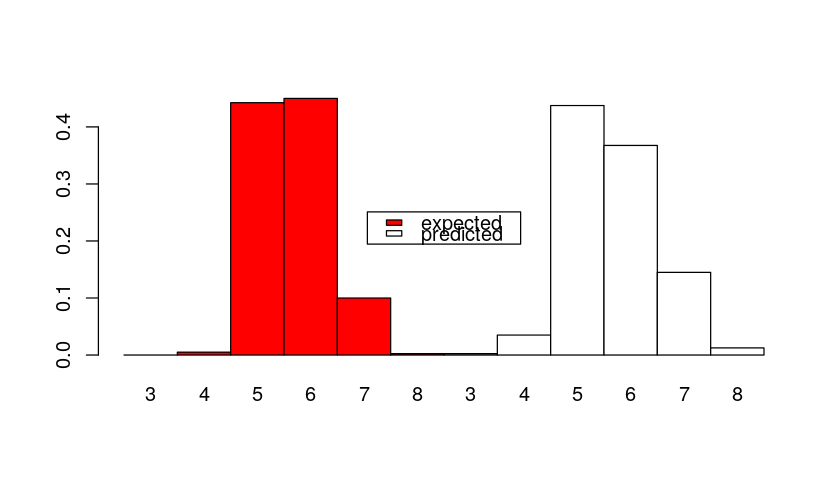

In [14]:
options(repr.plot.width=7, repr.plot.height=4)

#pdf("expected-predicted-hist-tree-bagging.pdf",width=7,height=4)
barplot(c(table(bag.predict)/sum(table(bag.predict)), 
          table(y.test)/sum(table(y.test))), space=0,col=c(rep("red", 6), rep("white",6)))
legend("center", legend=c("expected", "predicted"), fill=c("red","white"))
#dev.off()

In [15]:
bag.model


Bagging classification trees with 25 bootstrap replications 
Out-of-bag estimate of misclassification error:  0.3503 
